## Homework

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
# Завантажуємо зображення
img = cv2.imread('document.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray) / 255
rows, cols = gray.shape

In [3]:
# Координати кутів документа
top_left = [76, 115]
top_right = [219, 111]
bottom_left = [43, 330]
bottom_right = [256, 329]

In [4]:
# Визначаємо матриці src і dst для прямокутної ректифікації
src = np.array([top_left, top_right, bottom_left, bottom_right], dtype=np.float32)
dst = np.array([[0, 0], [cols - 1, 0], [0, rows - 1], [cols - 1, rows - 1]], dtype=np.float32)

(<Axes: title={'center': 'Affine (First 3 Points)'}>,
 Text(0.5, 1.0, 'Affine (First 3 Points)'))

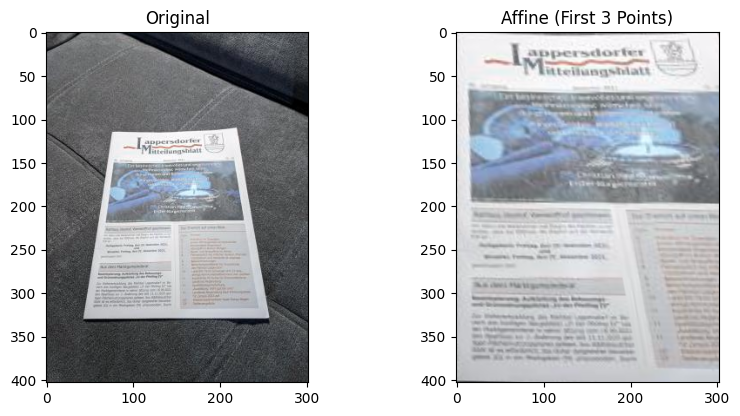

In [5]:
# Вибираємо перші 3 точки для обчислення афінного перетворення
M_affine_first3 = cv2.getAffineTransform(src[:3], dst[:3])
rectified_affine_first3 = cv2.warpAffine(img, M_affine_first3, (cols, rows))

plt.subplot(231), plt.imshow(img), plt.title('Original')
plt.subplot(232), plt.imshow(rectified_affine_first3), plt.title('Affine (First 3 Points)')

(<Axes: title={'center': 'Affine (Last 3 Points)'}>,
 Text(0.5, 1.0, 'Affine (Last 3 Points)'))

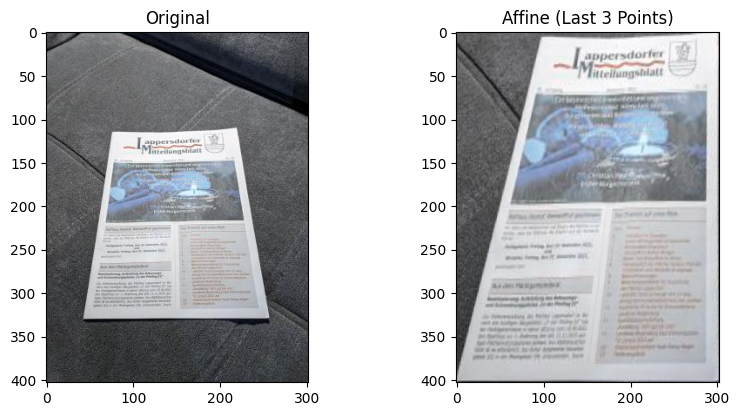

In [6]:
# Вибираємо останні 3 точки для обчислення афінного перетворення
M_affine_last3 = cv2.getAffineTransform(src[1:], dst[1:])
rectified_affine_last3 = cv2.warpAffine(img, M_affine_last3, (cols, rows))

plt.subplot(231), plt.imshow(img), plt.title('Original')
plt.subplot(232), plt.imshow(rectified_affine_last3), plt.title('Affine (Last 3 Points)')

(<Axes: title={'center': 'Affine (All 4 Points)'}>,
 Text(0.5, 1.0, 'Affine (All 4 Points)'))

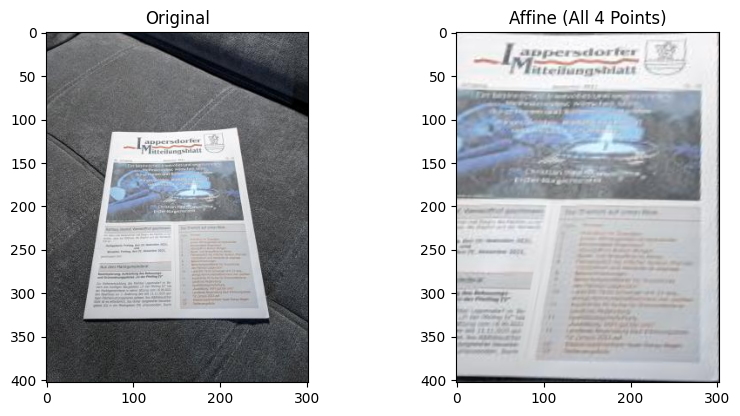

In [7]:
# Використовуємо всі 4 точки для оцінки афінного перетворення
M_affine, _ = cv2.estimateAffine2D(src, dst)
rectified_affine = cv2.warpAffine(img, M_affine, (cols, rows))

plt.subplot(231), plt.imshow(img), plt.title('Original')
plt.subplot(232), plt.imshow(rectified_affine), plt.title('Affine (All 4 Points)')

(<Axes: title={'center': 'Homography'}>,
 Text(0.5, 1.0, 'Homography'))

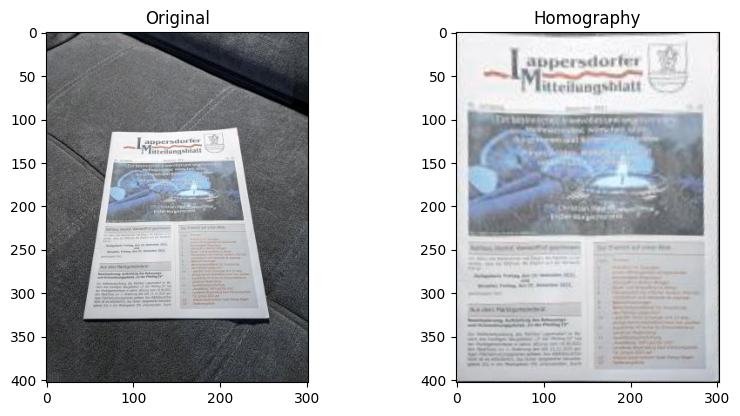

In [8]:
# Використовуємо всі 4 точки для обчислення гомографії
M_homography = cv2.getPerspectiveTransform(src, dst)
rectified_homography = cv2.warpPerspective(img, M_homography, (cols, rows))

plt.subplot(231), plt.imshow(img), plt.title('Original')
plt.subplot(232), plt.imshow(rectified_homography), plt.title('Homography')

Affine transformation handles linear transformations well, so it's not very suitable for this task even when using 4 corners. Homography aligns such that the corners of the document are parallel to the corners of the image, so the result looks quite good.